# Machine Learning Interpretation In Classifying Lending Risk

<u>**Team Members :**</u>
1. Caroline Angelina Sunarya - 2501995093
2. Esteban Micka Calypso Hulin - 2602214570
3. Favian Harya Nandana Adrian - 2501987463
4. Gabrielle Felicia Ariyanto - 2540134874
5. Salomo Hendrian Sudjono - 2501987772

<u>**Link Dataset :**</u>
https://www.kaggle.com/datasets/shravankoninti/janatahack-machine-learning-for-banking?select=train_fNxu4vz.csv 

# Data Descriptions

Data yang digunakan memiliki 13 kolom dengan keterangan sebagai berikut:
- ***Loan_ID*** : Nomor id peminjaman.
- ***Loan_Amount_Requested*** : Jumlah peminjaman yang ditawarkan ($).
- ***Length_Employed*** : Sudah berapa lama bekerja.
- ***Home_Owner*** : Status kepemilikan tempat tinggal (Mortage, Rent, or Own).
- ***Annual_Income*** : Penghasilan tahunan.
- ***Income_Verified*** : Status verifikasi penghasilan (Verified or not).
- ***Purpose_Of_Loan*** : Tujuan peminjaman.
- ***Debt_To_Income*** : Perbandingan dari jumlah hutang bulanan dengan total pendapatan kotor per bulan. (%)
- ***Inquiries_Last_6Mo*** : Jumlah pemeriksaan pinjaman dalam 6 bulan terakhir.
- ***Months_Since_Deliquency*** : Banyaknya bulan setelah jatuh tempo.
- ***Number_Open_Accounts*** : Jumlah akun yang dipakai. 
- ***Total_Accounts*** : Jumlah keseluruhan akun yang dimiliki peminjam.
- ***Gender*** : Jenis kelamin.
- ***Interest_Rate* (Target Variable)** : Menyatakan kategori risiko peminjaman, semakin besar interest_rate, maka semakin besar juga risiko nya.

# 1.  Load Data

In [ ]:
# Import Libraries for Data Load
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('train.csv')
df.head()S

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


* Values in `Income_Verified` are such as `VERIFIED - income` and `VERIFIED - income source`.
* The separator in `Loan_Amount_Requested` is `,` which indicates that the feature is object data typed.

# 2. Exploratory Data Analysis 

In [ ]:
# Import Libraries for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

The data type for `Loan_Amount_Requested` feature is in object. Therefore, type casting of the feature from the previous data type to `int` is needed.

In [ ]:
df['Loan_Amount_Requested'] = df['Loan_Amount_Requested'].str.replace(',', '').astype(int)

As mentioned previously, the feature `Loan_Amount_Requested` must be type cast to `int`. In order to perform type casting, firstly the separator `,` must be removed, then type casting could be perform.

In [ ]:
df.describe()

,Loan_ID,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,164309.00000,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,14349.33692,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,8281.86870,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,500.00000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,8000.00000,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,12075.00000,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,20000.00000,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,35000.00000,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


The minimum value of `Debt_To_Income` is not suppose to be `0`. The value `0` indicated that the creditor did not loan even a cent from the debtor. Therefore, the value `0` will be considered as missing values.

In [ ]:
df.select_dtypes('object').describe().T

,count,unique,top,freq
Length_Employed,156938,11,10+ years,52915
Home_Owner,138960,5,Mortgage,70345
Income_Verified,164309,3,VERIFIED - income,59421
Purpose_Of_Loan,164309,14,debt_consolidation,97101
Gender,164309,2,Male,117176


* The creditors majorly has work for **more than 10 years**.
* Majority of the creditor has mortgage and is a Male.
* Majority of the purpose of loan was for **debt consolidation**, which indicated that the creditor has multiple loans.
* The creditors mainly are **Male**.

In [ ]:
df['Debt_To_Income'] = df['Debt_To_Income'].apply(lambda x: np.nan if x == 0 else x)

The value `0` in `Debt_To_Income` feature will be considered as missing values (NULL) since it indicated that the the debtor has not made any loan. Therefore, changing the value `0` to *Not a Number* is needed.

In [ ]:
# Import Libraries for Data Transformation
import re

In [ ]:
def adjust_income_verified(string):
    adjusted_str = re.sub('\s-.+','',string)
    if adjusted_str == 'VERIFIED':
        return 'VERIFIED'
    else:
        return 'NOT VERIFIED'


df['Income_Verified'] = df['Income_Verified'].apply(adjust_income_verified)

As previously mentioned, the feature `Income_Verified` has the value `VERIFIED - income` and `VERIFIED - income source`. Both value categories could be joined into one category called `VERIFIED`. Therefore, all of the values in `Income_Verified` that has the word `VERIFIED` as prefix (`VERIFIED ...`) will be changed to only `VERIFIED`. 

## 2.1 Missing Values Check

In [ ]:
df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income               112
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

The features that has missing values in it are `Length_Employed`, `Home_Owner`, `Annual_Income`, `Debt_To_Income`, and `Months_Since_Deliquency` which has the most missing values count amongst all features. 

## 2.2 Data Duplication Check

In [ ]:
df[df.duplicated(keep = False)]

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate


There are no duplicated data detected in this data.

## 2.3 Data Cleaning

In [ ]:
df_copy = df.copy()
df_copy.drop(['Months_Since_Deliquency','Loan_ID'], axis = 1, inplace = True)
df_copy = df_copy.dropna()

* Drop the feature `Months_Since_Deliquency` entirely since the percentage of the missing values is more than 50%.
* The entire `Loan_ID` were dropped because the feature could not be used for analysis or modelling purposes.
* Drop all records of data that has missing values or null value considering that the count was pretty much.  

In [ ]:
df_eda = df_copy.copy()
df_eda.shape

(112424, 12)

## 2.4 Check Data Distribution

<AxesSubplot: xlabel='Total_Accounts', ylabel='Density'>

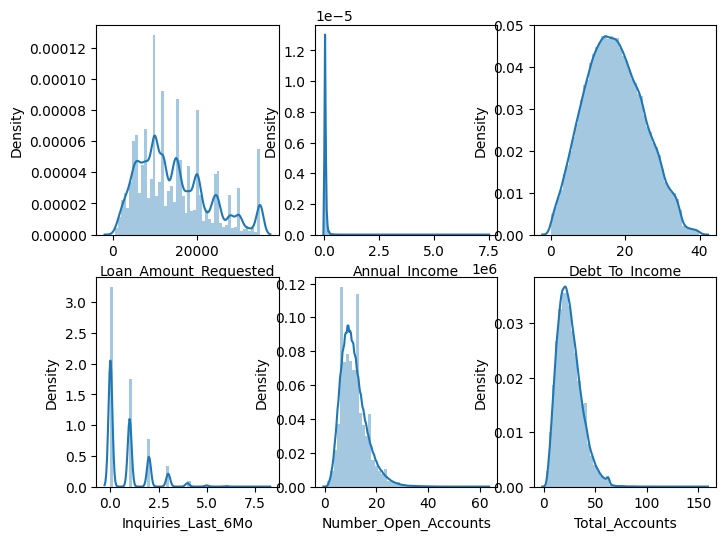

In [ ]:
fig,ax = plt.subplots(2, 3, figsize = (8,6))
sns.distplot(df_eda['Loan_Amount_Requested'], ax = ax[0,0])
sns.distplot(df_eda['Annual_Income'], ax = ax[0,1])
sns.distplot(df_eda['Debt_To_Income'], ax = ax[0,2])
sns.distplot(df_eda['Inquiries_Last_6Mo'], ax = ax[1,0])
sns.distplot(df_eda['Number_Open_Accounts'], ax = ax[1,1])
sns.distplot(df_eda['Total_Accounts'], ax = ax[1,2])

* The features `Loan_Amount_Requested`, `Annual_Income`, `Inquiries_Last_6Mo`, `Number_Open_Account`, and `Total_Accounts` have a positive skew distribution which indicated that there are outliers that made the mean value sloped towards the right. 
* `Debt_To_Income` feature has a normal distribution.

## 2.5 Check Correlation

<AxesSubplot: >

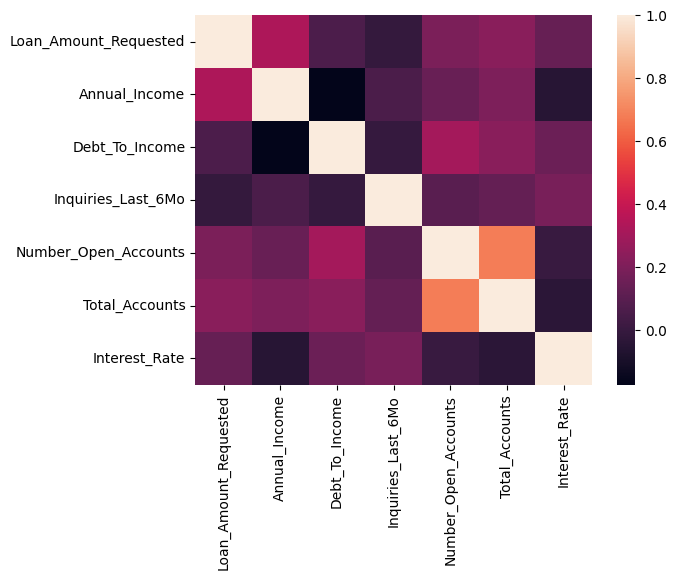

In [ ]:
sns.heatmap(df_eda.corr())

From the correlation table above, `Number_Open_Accounts` feature has a strong correlation towards `Total_Accounts` feature. Either one of the feature must be drop since `Number_Open_Accounts` could be explained with the feature `Total_Accounts`.

# 3. Data Preprocessing I

## 3.1 Data Transformation

In [ ]:
def group_loan_request(amount):
    if amount < 1000:
        return '< $1000'
    elif amount < 5000:
        return '< $5000'
    elif amount < 10000:
        return '< $10000'
    elif amount < 20000:
        return '< $20000'
    elif amount < 30000:
        return '< $30000'
    else:
        return '>= $30000'

def group_annual_income(income):
    if income < 10000:
        return '< $10.000'
    elif income < 50000:
        return '< $50.000'
    elif income < 100000:
        return '< $100.000'
    elif income < 1000000:
        return '< $1.000.000'
    else:
        return '>= $.1000.000'
    
def group_last_inquiries(count):
    if count == 0:
        return 'never'
    elif count == 1:
        return 'once'
    else:
        return 'multiples'
    
def group_account(account):
    if account == 0:
        return "Don't have account"
    elif account < 5:
        return '< 5 account'
    elif account < 10:
        return '< 10 account'
    elif account < 20:
        return '< 20 account'
    else:
        return '>= 20 Account'

def adjust_employee_length(string):
    if string == '< 1 year':
        return '<= 1 year'
    elif string == '1 year':
        return '<= 1 year'
    elif string == '2 years':
        return '> 1 years'
    elif string == '3 years':
        return '> 1 years'
    elif string == '4 years':
        return '> 1 years'
    elif string == '5 years':
        return '> 1 years'
    elif string == '6 years':
        return '> 5 years'
    elif string == '7 years':
        return '> 5 years'
    elif string == '8 years':
        return '> 5 years'
    elif string == '9 years':
        return '> 5 years'
    else:
        return '>= 10 years'

In [ ]:
df_transform = df_eda.copy()
df_transform.drop(['Number_Open_Accounts'], axis = 1, inplace = True)
df_transform['Loan_Amount_Requested'] = df_transform['Loan_Amount_Requested'].apply(group_loan_request)
df_transform['Annual_Income'] = df_transform['Annual_Income'].apply(group_annual_income)
df_transform['Inquiries_Last_6Mo'] = df_transform['Inquiries_Last_6Mo'].apply(group_last_inquiries)
df_transform['Total_Accounts'] = df_transform['Total_Accounts'].apply(group_account)
df_transform['Length_Employed'] = df_transform['Length_Employed'].apply(adjust_employee_length)
df_transform.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Total_Accounts,Gender,Interest_Rate
0,< $10000,<= 1 year,Rent,< $100.000,NOT VERIFIED,car,18.37,never,< 20 account,Female,1
2,< $30000,> 5 years,Mortgage,< $100.000,VERIFIED,debt_consolidation,15.88,never,< 20 account,Male,3
4,< $20000,> 5 years,Own,< $100.000,VERIFIED,debt_consolidation,22.17,once,>= 20 Account,Female,1
5,< $5000,> 1 years,Rent,< $50.000,VERIFIED,credit_card,10.88,once,< 20 account,Male,3
6,< $20000,> 1 years,Rent,< $100.000,VERIFIED,debt_consolidation,5.65,never,< 20 account,Male,3


* The feature `Number_Open_Accounts` is needed to be drop since it has a multi-collinearity proven by the previous correlation check.
* From the distribution check previously, outliers has been detected. Therefore, the features that has outliers in it will type cast to object data typed with each new categories represent the existed range of values.

## 3.2 Data Encoding

In [ ]:
# Import Libraries for Data Encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder 

* `Nominal` data type will be encoded with `OneHotEncoder` method.
* `Ordinal` data type will be encoded with `OrdinalEncoder` method.

In [ ]:
onehot_enc = OneHotEncoder()
ordinal_enc = OrdinalEncoder()

ordinal_data = ['Loan_Amount_Requested','Length_Employed','Income_Verified',
                'Annual_Income','Inquiries_Last_6Mo','Total_Accounts']

df_encoded = df_transform.copy()
df_encoded[ordinal_data] = ordinal_enc.fit_transform(df_encoded[ordinal_data])

nominal_encode = pd.DataFrame(onehot_enc.fit_transform(df_encoded.select_dtypes('object')).toarray(),
                               columns = onehot_enc.get_feature_names_out(), 
                               index = df_encoded.index)

df_encoded = pd.concat([df_encoded,nominal_encode], axis = 1)
df_encoded.drop(df_encoded.select_dtypes('object'), axis = 1, inplace = True)
df_encoded.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Total_Accounts,Interest_Rate,Home_Owner_Mortgage,Home_Owner_None,...,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Female,Gender_Male
0,1.0,0.0,2.0,0.0,18.37,1.0,1.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,2.0,2.0,1.0,15.88,1.0,1.0,3,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.0,2.0,2.0,1.0,22.17,2.0,3.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,4.0,1.0,3.0,1.0,10.88,2.0,1.0,3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,2.0,1.0,2.0,1.0,5.65,1.0,1.0,3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


* The values of the features `Loan_Amount_Requested`, `Length_Employed`, `Income_Verified`, `Annual_Income`, `Inquiries_Last_6Mo`, and `Total_Accounts` were encoded by `OrdinalEncoder` method since the values in each features were in ordinal data type which has levels.
* Other features that were object data typed and has no levels were encoded by `OneHotEncoder` method.

## 3.3 Data Scaling

In [ ]:
# Import Library for Data Scaling
from sklearn.preprocessing import StandardScaler

Scaling will be perform in the features that were not in object data type such as `Debt_To_Income` feature. Since the feature is normally distributed, `StandardScaler` method will be perform.

In [ ]:
st_scaler = StandardScaler()

df_scaled = df_encoded.copy()
df_scaled['Debt_To_Income'] = st_scaler.fit_transform(df_scaled[['Debt_To_Income']])
df_scaled.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Total_Accounts,Interest_Rate,Home_Owner_Mortgage,Home_Owner_None,...,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Female,Gender_Male
0,1.0,0.0,2.0,0.0,0.156535,1.0,1.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,2.0,2.0,1.0,-0.162484,1.0,1.0,3,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.0,2.0,2.0,1.0,0.643391,2.0,3.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,4.0,1.0,3.0,1.0,-0.803084,2.0,1.0,3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,2.0,1.0,2.0,1.0,-1.473152,1.0,1.0,3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 3.4 Data Splitting

In [ ]:
# Import Library to Perform Data Spliting
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
x = df_scaled.drop(['Interest_Rate'], axis = 1)
y = df_scaled['Interest_Rate']

The features must be divided into dependent and independent variable before performing any modelling algorithms. The feature `Interest_Rate` is the target variable and were included in the `y` variable, and other features were included in the `x` variable. Which variable `y` is considered as dependent variable, and variable `x` is considered as independent variable.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, random_state = 42,
                                                    stratify = y)

Both `Independent Data` and `Dependent Data` were divided into train and test data by using `Stratify` sampling with the intention to keep the proportion of the class division equal. Training data will be divided and have 80% of the original data, while testing data will have the remaining 20% of the original data.

# 4. Modelling

In [ ]:
# Import Libraries to Perform Classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Import Libraries to Check Modelling Performance
from sklearn.metrics import classification_report, roc_auc_score

## 4.1 Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

roc = cross_val_score(lr, x_train, y_train, cv = 3, scoring = 'roc_auc_ovo').mean()
acc = cross_val_score(lr, x_train, y_train, cv = 3, scoring = 'accuracy').mean()
print(classification_report(y_test,pred))
print(f"Average ROC score: {roc}")
print(f"Average accuracy: {acc}")

              precision    recall  f1-score   support

           1       0.49      0.12      0.19      4645
           2       0.48      0.65      0.55      9682
           3       0.53      0.53      0.53      8158

    accuracy                           0.50     22485
   macro avg       0.50      0.43      0.42     22485
weighted avg       0.50      0.50      0.47     22485

Average ROC score: 0.6533155645992285
Average accuracy: 0.4949131922551108


Using the `Logistic Regression` method, the model's accuracy is as only high as 50% and the ROC AUC score is only as high as 65%. The differences between the precision score and the recall score are 37% for `class 1`, 17% for `class 2`, and 0% for `class 3`. Which indicates that the model performed well in classifying which debtors are included as **High Risk (Class 3)**, although the model performed badly in predicting which debtors are included in other classes.

## 4.2 Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)

roc = cross_val_score(rf, x_train, y_train, cv = 3, scoring = 'roc_auc_ovo').mean()
acc = cross_val_score(rf, x_train, y_train, cv = 3, scoring = 'accuracy').mean()
print(classification_report(y_test,pred))
print(f"Average ROC score: {roc}")
print(f"Average accuracy: {acc}")

              precision    recall  f1-score   support

           1       0.32      0.28      0.30      4645
           2       0.45      0.47      0.46      9682
           3       0.47      0.48      0.48      8158

    accuracy                           0.44     22485
   macro avg       0.41      0.41      0.41     22485
weighted avg       0.43      0.44      0.43     22485

Average ROC score: 0.6076534867374224
Average accuracy: 0.4351616074176836


Using the `Random Forest Classifier` method, the model's accuracy is only as high as 44% and the ROC AUC score is only as high as 61%. The differences between the precision score and the recall score are 4% for `class 1`, 2% for `class 2`, and 1% for `class 3`. Although the differences between the precision and recall score are not as high as the previous model, the model's accuracy and the ROC AUC score is lower than the previous model which indicates that the model perform badly on predicting the which debtors classify to which class. 

* ***When using the whte-box model such as `Logistic Regression`, the ROC score generated is quite well. However, the model's accuracy is no higher than 50% which indicates that each prediction is not any better than random guessing.***
* ***When using the black-box model such as `Random Forest Classifier`, the model's accuracy and the ROC score were worse than the model's accuracy and the ROC score of `Logistic Regression`.***

***From the model's results, `Clustering` is considered to be used. `Clustering` might gives insight how many class is suitable using the pattern of the data.***

# 5. Clustering

In [ ]:
!pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 KB 21.8 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

* The method being used for clustering is the `KMeans` algorithm.
* `yellowbrick` library is being used to determinate easily the suitable number of class or *K* value by visualization.

In [ ]:
df_cluster = df_scaled.drop(['Interest_Rate'], axis = 1)

Clustering is done to create new label, therefore the previous label will be dropped.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

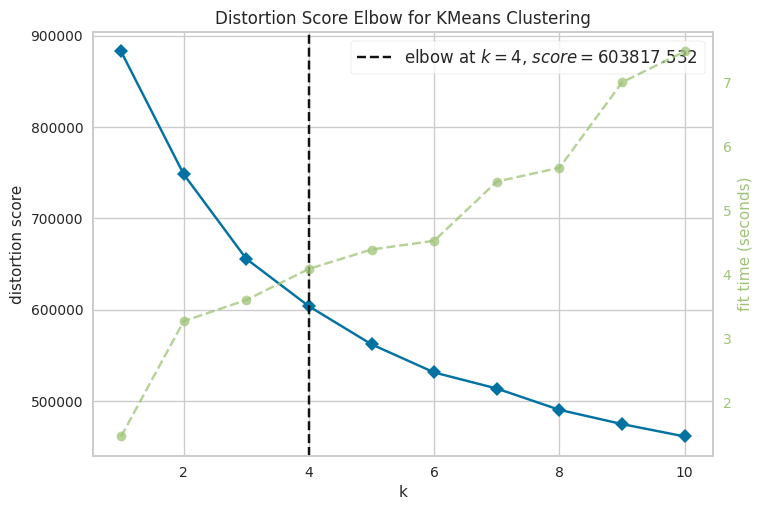

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#mencari nilai k yang tepat menggunakan KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(init='k-means++', random_state = 42), k = (1,11))
visualizer.fit(df_cluster)
visualizer.show()

From the visualization of `Elbow Method` above, the optimal *K* value is 4. To ensure that the *K* value is optimal, more observation is needed to ensure that each center is well-matched with the value *K* = 4 and the surroundings.

Text(1.0, 1.12, 'Silhoutte Plot of Kmeans CLustering for 112424 Samples')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

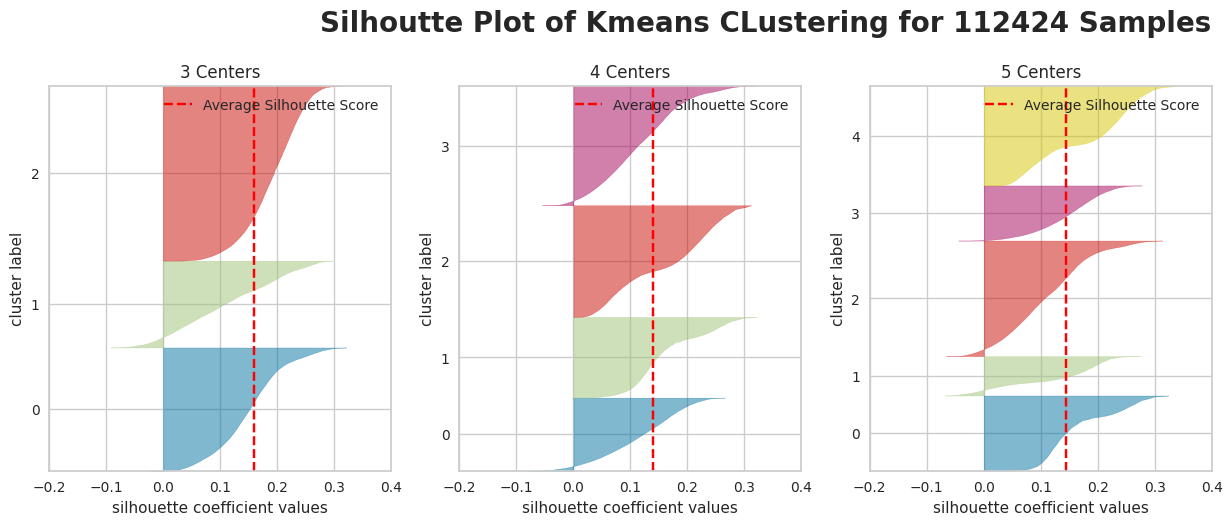

In [ ]:
fig, axes = plt.subplots(ncols = 3,figsize = (15,5))

def silhouette_plot(n_cluster,ax):
    visualizer = SilhouetteVisualizer(KMeans(n_clusters = n_cluster,
                                            init = 'k-means++',
                                            random_state = 42),
                                    colors = 'yellowbrick', ax = axes[ax],
                                    title = str(n_cluster) + ' Centers')
    visualizer.fit(df_cluster)
    visualizer.finalize()

for axis, cluster in enumerate([3,4,5]):
    silhouette_plot(n_cluster = cluster, ax = axis)

plt.title('Silhoutte Plot of Kmeans CLustering for 112424 Samples',
          fontsize=20, fontweight = 'bold', y = 1.12, loc = 'center')

From the silhouette score, it could be seen that *K* = 4 has an equal label proportion. It is proven that 4 is the optimal value of *K* for 112424 data observations.

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(df_cluster)

KMeans(n_clusters=4, random_state=42)

The clustering that has been done using `KMeans` algorithm and the observations using `Elbow Method` and `Silhouette Score` gave insight that the optimal number of classes is 4 (*K* = 4).

# 6. Cluster Analysis

In [ ]:
new_df = df_eda.copy()
new_df.drop(['Interest_Rate'], axis = 1, inplace = True)
new_df['cluster'] = kmeans.labels_
new_df['cluster'].value_counts()

3    34908
2    32607
1    23570
0    21339
Name: cluster, dtype: int64

* New feature with the name `cluster` was added and has the values in which obtained from the clustering performed above using the `K-Means` algorithm. Clustering provide the insight that the optimal number of cluster is 4.
* **Cluster 0** has **21346** records of data, **cluster 1** has **23567** records of data, **cluster 2** has **34902** records of data, and **cluster 3** has **32609** records of data.

In [ ]:
ordinal_enc = OrdinalEncoder()

new_df_encoded_ord = new_df.copy()
ordinal_data = ['Income_Verified','Length_Employed']

new_df_encoded_ord['Income_Verified'] = new_df_encoded_ord['Income_Verified'].apply(adjust_income_verified)

new_df_encoded_ord[ordinal_data] = ordinal_enc.fit_transform(new_df_encoded_ord[ordinal_data])
new_df_encoded_ord.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,cluster
0,7000,10.0,Rent,68000.0,0.0,car,18.37,0,9,14,Female,3
2,24725,7.0,Mortgage,75566.4,1.0,debt_consolidation,15.88,0,12,16,Male,3
4,17000,8.0,Own,96000.0,1.0,debt_consolidation,22.17,1,19,30,Female,2
5,4500,2.0,Rent,30000.0,1.0,credit_card,10.88,1,12,15,Male,3
6,18075,4.0,Rent,85000.0,1.0,debt_consolidation,5.65,0,9,12,Male,3


* Exactly like what has done in exploratory data analysis step, the feature `Income_Verified` where adjusted from `VERIFIED ...` to just `VERIFIED`.
* Type of encode performed on dataset `new_df` was `OrdinalEncoder` for features that are ordinal data typed such as `Income_Verified`, and `Length_Employed`.

## 6.1 Observe Characteristics of Each Cluster

In [ ]:
new_df_encoded_ord.groupby('cluster').agg(['mean','median']).T

cluster                                   0             1             2  \
Loan_Amount_Requested mean     20964.751160  13210.147433  14732.502223   
                      median   20050.000000  12000.000000  14000.000000   
Length_Employed       mean         3.500820      4.080229      3.215199   
                      median       2.000000      3.000000      1.000000   
Annual_Income         mean    141067.285667  59974.044703  64843.077404   
                      median  122000.000000  59000.000000  63406.200000   
Income_Verified       mean         0.801303      0.634832      0.697396   
                      median       1.000000      1.000000      1.000000   
Debt_To_Income        mean        13.992022     19.161247     19.842433   
                      median      13.400000     19.020000     19.760000   
Inquiries_Last_6Mo    mean         0.911664      0.831650      0.811298   
                      median       1.000000      1.000000      0.000000   
Number_Open_Accounts  mean        12.707906     13.090963     12.650167   
                      median      12.000000     12.000000     12.000000   
Total_Accounts        mean        30.283050     30.238736     30.401417   
                      median      29.000000     28.000000     28.000000   

cluster                                  3  
Loan_Amount_Requested mean    11150.857253  
                      median  10000.000000  
Length_Employed       mean        4.048298  
                      median      3.000000  
Annual_Income         mean    52595.782042  
                      median  50000.000000  
Income_Verified       mean        0.590237  
                      median      1.000000  
Debt_To_Income        mean       15.201743  
                      median     14.710000  
Inquiries_Last_6Mo    mean        0.646012  
                      median      0.000000  
Number_Open_Accounts  mean        7.823508  
                      median      8.000000  
Total_Accounts        mean       13.659963  
                      median     14.000000

* **Cluster 0 (Low Risk)**
  Debtors that belong to this cluster has the characteristics: **has the highest loan rate amongst all clusters**, **has been employed for more than 5 years**, **has the highest annual income**, **oftenly making loans**, and **has the lowest debt to income ratio**.
* **Cluster 1 (Low-Medium Risk)**
  Debtors that belong to this cluster has the characteristics: **has a pretty low loan rate**, **has been employed for more than 10 years**, **has a pretty low annual income**, **oftenly making loans**, and **has a pretty high debt to income ratio**.
* **Cluster 2 (High-Medium Risk)**
  Debtors that belong to this cluster has the characteristics: **has the least loan rate amongst all clusters**, **has been employed for more than 10 years**, **has the lowest annual income**, **rarely making loans**, and **has a pretty low debt to income ratio**.
* **Cluster 3 (High Risk)**
  Debtors that belong to this cluster has the characteristics: **has a pretty high loan rate**, **has been employed for more than 1 year**, **has a pretty high annual income**, **oftenly making loans**, and **has the highest debt to income ratio**.

In [ ]:
new_df_encoded_ord.query("cluster == 0").select_dtypes('object').describe()

,Home_Owner,Purpose_Of_Loan,Gender
count,21339,21339,21339
unique,5,14,2
top,Mortgage,debt_consolidation,Male
freq,14931,12276,15156


**Cluster 0**
* Majorly has the home ownership status as `Mortgage`.
* Majorly has the purpose of loan as `Debt Consolidation`.
* Majority of the debtors are `Male`.

In [ ]:
new_df_encoded_ord.query("cluster == 1").select_dtypes('object').describe()

,Home_Owner,Purpose_Of_Loan,Gender
count,23570,23570,23570
unique,5,14,2
top,Rent,debt_consolidation,Male
freq,11278,14283,16887


**Cluster 1**
* Majorly has the home ownership status as `Rent`.
* Majorly has the purpose of loan as `Debt Consolidation`.
* Majority of the debtors are `Male`.

In [ ]:
new_df_encoded_ord.query("cluster == 2").select_dtypes('object').describe()

,Home_Owner,Purpose_Of_Loan,Gender
count,32607,32607,32607
unique,5,14,2
top,Mortgage,debt_consolidation,Male
freq,20025,20653,23234


**Cluster 2**
* Majorly has the home ownership status as `Rent`.
* Majorly has the purpose of loan as `Debt Consolidation`.
* Majority of the debtors are `Male`.

In [ ]:
new_df_encoded_ord.query("cluster == 3").select_dtypes('object').describe()

,Home_Owner,Purpose_Of_Loan,Gender
count,34908,34908,34908
unique,5,14,2
top,Rent,debt_consolidation,Male
freq,19824,19573,24864


**Cluster 3**
* Majorly has the home ownership status as `Mortgage`.
* Majorly has the purpose of loan as `Debt Consolidation`.
* Majority of the debtors are `Male`.

***Features such as `Gender`, `Home_Owner`, `Income_Verified`, and `Inquiries_Last_6Mo` has no role in creating cluster since there is no major value difference in each feature for each cluster.***

# 7. Data Preprocessing II

## 7.1 Feature Selection

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

As mentioned previously, features that did not play a part in creating clusters are `Gender`, `Purpose_Of_Loan`, `Home_Owner`, `Income_Verified`, and `Inquiries_Last_6Mo`. To check those accusation, `Decision Tree` will be used to oversee the coefficient of each feature.

In [ ]:
feature_selection = new_df_encoded_ord.copy()

feature_selection_en = pd.DataFrame(onehot_enc.fit_transform(feature_selection.select_dtypes('object')).toarray(),
                                    columns = onehot_enc.get_feature_names_out(),
                                    index = feature_selection.index)

feature_selection = pd.concat([feature_selection,nominal_encode], axis = 1)
feature_selection.drop(feature_selection.select_dtypes('object'), axis = 1, inplace = True)

x = feature_selection.drop(['cluster'],axis = 1)
y = feature_selection['cluster']
x_train,x_test,y_train,y_test = train_test_split(x, y,
                                                test_size = 0.2,
                                                random_state = 42,
                                                stratify = y)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
roc = roc_auc_score(y_test, dt.predict_proba(x_test), multi_class='ovo')
print(f"ROC Score: {roc}")

importance = dt.feature_importances_
score = []
for v in importance:
    score.append(v)

ROC Score: 0.9969721818998681


With a high ROC score, `Decision Tree` could be the reference to determine which feature plays a part in creating clusters.

<BarContainer object of 29 artists>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

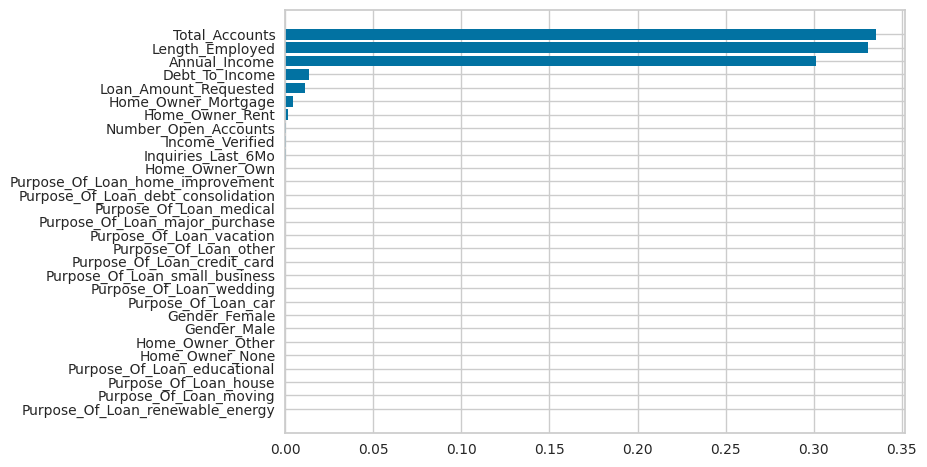

In [ ]:
features = x_train.columns
to_df = {'features': features, 'score': score}
features_df = pd.DataFrame(to_df).sort_values('score')
plt.barh(features_df['features'], features_df['score'])

Proven by gini importance, there were only several feature that played a part in creating clusters such as `Total_Accounts`, `Length_Employed`, `Annual_Income`, `Debt_To_Income`, `Loan_Amount_Requested`, etc.

In [ ]:
selected_feature = new_df_encoded_ord.copy()
dropped_feature = ['Home_Owner','Income_Verified','Number_Open_Accounts','Inquiries_Last_6Mo','Purpose_Of_Loan','Gender']
selected_feature.drop(dropped_feature, axis = 1, inplace = True)
selected_feature.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Total_Accounts,cluster
0,7000,10.0,68000.0,18.37,14,3
2,24725,7.0,75566.4,15.88,16,3
4,17000,8.0,96000.0,22.17,30,2
5,4500,2.0,30000.0,10.88,15,3
6,18075,4.0,85000.0,5.65,12,3


Dropping features is performed after knowing the features that do not contribute in cluster classification such as `Home_Owner`, `Income_Verified`, `Number_Open_Accounts`, `Inquiries_Last_6Mo`, `Purpose_Of_Loan`, and `Gender`. Dropping feature is done so that the model would not have too complex input.

## 7.2 Check Correlation II

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

<AxesSubplot: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

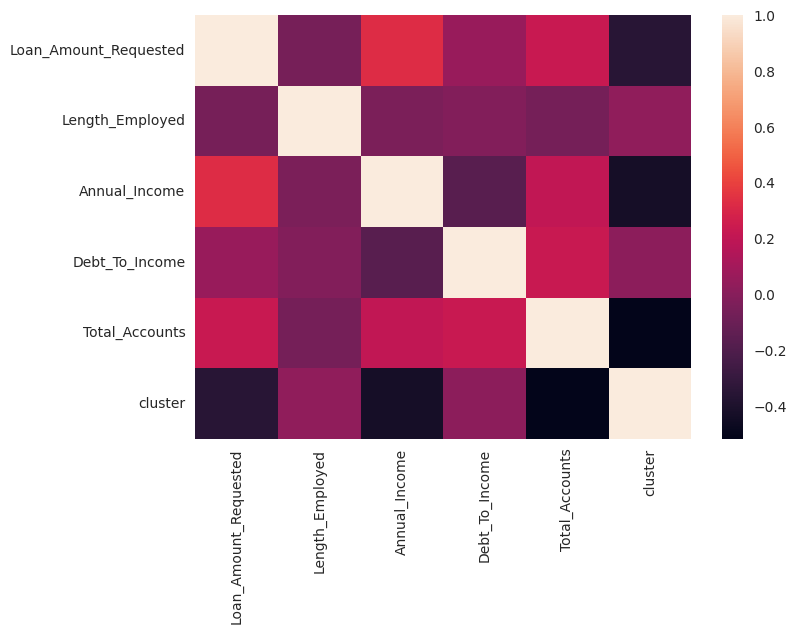

In [ ]:
sns.heatmap(selected_feature.corr())

All features do not have any multi collinearity or the relation between all independent variables are not dependent on each other.

## 7.3 Data Scaling II

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
rb_scaler = RobustScaler()

new_df_scaled = selected_feature.copy()
to_be_scaled = ['Loan_Amount_Requested','Annual_Income','Debt_To_Income']
new_df_scaled[to_be_scaled] = rb_scaler.fit_transform(new_df_scaled[to_be_scaled])
new_df_scaled.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Total_Accounts,cluster
0,-0.458333,10.0,0.070500,0.140845,14,3
2,1.018750,7.0,0.242464,-0.078345,16,3
4,0.375000,8.0,0.706864,0.475352,30,2
5,-0.666667,2.0,-0.793136,-0.518486,15,3
6,0.464583,4.0,0.456864,-0.978873,12,3


`RobustScaler` is the more optimal scaling method to use since there were outliers in `Loan_Ammount_Requested` and `Annual_Income` features. `RobustScaler` is performed to `Loan_Ammount_Requested`, `Annual_Income`, and `Debt_To_Income` features. 

## 7.4 Data Spliting II

In [ ]:
x = new_df_scaled.drop(['cluster'],axis=1)
y = new_df_scaled['cluster']
x_train,x_test,y_train,y_test = train_test_split(x, y,
                                                 test_size = 0.2,
                                                 random_state = 42,
                                                 stratify = y)

This step covers:
* Separated dependent and independent variables by dropping the feature `cluster` and store the values of other features into a variable called `x` (independent variable), and store the values of feature `cluster` in a variable called `y` (dependent variable).
* Divide train and test set with the proportion ratio 80:20. Train data will receive 80% of the overall data while test set will receive 20% of the overall data.
* `Stratify` sampling is used for the purpose of sampling so that the class proportions are equally divided and the frequency of each class for test data and train data is equal.

# 8. Modelling II 

## 8.1 Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

print('=========================================')
print('Logistic Regression Classification Report')
print('=========================================')
roc = cross_val_score(lr, x_train, y_train, cv = 3, scoring = 'roc_auc_ovo').mean()
acc = cross_val_score(lr, x_train, y_train, cv = 3, scoring = 'accuracy').mean()
print(classification_report(y_test,pred))
print(f"Average ROC score: {roc}")
print(f"Average accuracy: {acc}")

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      4268
           1       0.52      0.30      0.38      4714
           2       0.59      0.72      0.65      6521
           3       0.90      0.97      0.94      6982

    accuracy                           0.75     22485
   macro avg       0.73      0.73      0.72     22485
weighted avg       0.73      0.75      0.73     22485

Average ROC score: 0.9168946883623376
Average accuracy: 0.74236984976282


The model using the `Logistic Regression` algorithm produces an accuracy of about 74% and the average ROC AUC value is 92%. The smallest difference between precision and recall values ​​is about 2% and the maximum is about 22% for all classes. The model built using this algorithm still has poor performance even though the accuracy value has increased drastically from step Modelling I.

## 8.2 K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knnModel = knn.fit(x_train, y_train)
knnPred = knn.predict(x_test)

print('=====================================')
print('K-Nearest Neighbors Classifier Report')
print('=====================================')
roc = cross_val_score(knn, x_train, y_train, cv = 3, scoring = 'roc_auc_ovo').mean()
acc = cross_val_score(knn, x_train, y_train, cv = 3, scoring = 'accuracy').mean()
print(classification_report(y_test,knnPred))
print(f"Average ROC score: {roc}")
print(f"Average accuracy: {acc}")

K-Nearest Neighbors Classifier Report
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      4268
           1       0.95      0.98      0.96      4714
           2       0.95      0.98      0.96      6521
           3       0.96      0.98      0.97      6982

    accuracy                           0.95     22485
   macro avg       0.95      0.94      0.95     22485
weighted avg       0.95      0.95      0.95     22485

Average ROC score: 0.991217307441998
Average accuracy: 0.9477757163688884


The model using the `K-Nearest Neighbors Classifier` algorithm produces an accuracy of about 95% and the average ROC AUC value is 99%. The smallest difference between precision and recall values ​​is about 2% and the maximum is about 9% for all classes. The accuracy for this model compared to the previous model has drastically improved.

## 8.3 Boosting Classifier

### 8.3.1 AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaBoost = AdaBoostClassifier()
abModel = adaBoost.fit(x_train, y_train)
abPred = adaBoost.predict(x_test)

print('==========================')
print('AdaBoost Classifier Report')
print('==========================')
roc = cross_val_score(adaBoost, x_train, y_train, cv = 3, scoring = 'roc_auc_ovo').mean()
acc = cross_val_score(adaBoost, x_train, y_train, cv = 3, scoring = 'accuracy').mean()
print(classification_report(y_test,abPred))
print(f"Average ROC score: {roc}")
print(f"Average accuracy: {acc}")

AdaBoost Classifier Report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4268
           1       1.00      0.96      0.98      4714
           2       0.96      0.97      0.97      6521
           3       0.97      0.96      0.97      6982

    accuracy                           0.96     22485
   macro avg       0.96      0.96      0.96     22485
weighted avg       0.96      0.96      0.96     22485

Average ROC score: 0.9847711857046191
Average accuracy: 0.8665550048550403


The model using the `AdaBoost Classifier` algorithm produces an accuracy of around 87% and the ROC AUC value is 98%. However, the smallest difference between precision and recall values ​​is about 1% and the maximum is about 2% for all classes. The average accuracy of this model is worse compared to the previous model.

### 8.3.2 Gradient Tree Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradientBoosting = GradientBoostingClassifier()
gbModel = gradientBoosting.fit(x_train, y_train)
gbPred = gradientBoosting.predict(x_test)

print('===================================')
print('Gradient Boosting Classifier Report')
print('===================================')
roc = cross_val_score(gradientBoosting, x_train, y_train, cv = 3, scoring = 'roc_auc_ovo').mean()
acc = cross_val_score(gradientBoosting, x_train, y_train, cv = 3, scoring = 'accuracy').mean()
print(classification_report(y_test,gbPred))
print(f"Average ROC score: {roc}")
print(f"Average accuracy: {acc}")

Gradient Boosting Classifier Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4268
           1       1.00      0.99      0.99      4714
           2       0.99      0.99      0.99      6521
           3       0.99      0.99      0.99      6982

    accuracy                           0.99     22485
   macro avg       0.99      0.99      0.99     22485
weighted avg       0.99      0.99      0.99     22485

Average ROC score: 0.9998679169584203
Average accuracy: 0.9895484677833523


The model using the `Gradient Boosting Classifier` algorithm produces an accuracy of around 99% and its ROC AUC value is up to 99.9%. Seeing from the difference in precision and recall values, it can be concluded that the model can predict well. For all classes, the maximum difference between precision and recall is 1%.

# Conclusion

By using the target variable provided from the dataset, the results of the modeling carried out have a poor accuracy value. However, after performing *Clustering*, it was found that the optimal number of clusters was 4. So, modeling was done again. It was found that the algorithm that has the best performance is the `Gradient Tree Boosting` algorithm, which has an accuracy value up to 99% and the ROC AUC value is as high as 99.9%. The algorithm has been able to predict the value of each class well, and can be proven through the precision and recall values ​​where the maximum difference between precision and recall values ​​is only 1% for all classes unlike the other models that has the minimum difference between precision and recall values as high as 1% or even more.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4ed60a76-437a-4737-b724-f96e7e99795f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>